# Sentiment Analysis and Classification Project

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using algorithms ***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder, scale, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, recall_score

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud
import nltk
# nltk.download("punkt")
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download("averaged_perceptron_tagger")

import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

In [46]:
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv',index_col='Unnamed: 0')
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [47]:
df.shape

(23486, 10)

### Data Wrangling
Take info

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [49]:
def perc_col(df,col):
    for i in sorted(df[col].unique(),reverse=True):
        print('%s: %%%.2f' % (i, 100*df[col].value_counts()[i]/len(df)))

perc_col(df,'Recommended IND')

1: %82.24
0: %17.76


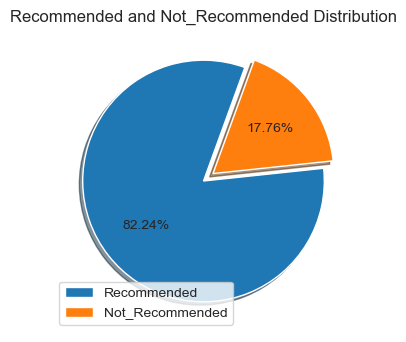

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [50]:
plt.pie(df['Recommended IND'].value_counts(),explode=[0,0.1],autopct='%1.2f%%',shadow=True,startangle=70)
plt.legend(labels=['Recommended','Not_Recommended'])
plt.title('Recommended and Not_Recommended Distribution')
plt.axis('off')
plt.show()

df['Recommended IND'].value_counts()

* inbalanced data. So we have to focus F1_scores

---
---


## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [51]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [52]:
new_col_names={'Clothing ID':'Clothing_ID', 
#                'Age':'Age', 'Title':'Title', 
               'Review Text':'Review', 
#                'Rating':'Rating',
               'Recommended IND':'Recommended', 
               'Positive Feedback Count':'Feedback', 
               'Division Name':'Division',
               'Department Name':'Department', 
               'Class Name':'Class'}
df.rename(new_col_names,axis=1,inplace=True)
df.head(5)

,Clothing_ID,Age,Title,Review,Rating,Recommended,Feedback,Division,Department,Class
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Missing Value Detection

In [53]:
# Dublicate row var mi bakilir?
df.duplicated().sum()

21

In [54]:
# dublicate olan satirlar drop edilir. 21 rows dublicated.
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [55]:
def null_values(df):
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)

null_values(df)

,Missing_Records,Percentage (%)
Title,3789,16.147454
Review,825,3.515875
Division,14,0.059663
Department,14,0.059663
Class,14,0.059663


> **Title ve Review ayni sutunda birlestirildikten sonra empty rows ve Nan values drop edilecek.**

In [56]:
df.Title.fillna('',inplace=True)
df.Review.fillna('',inplace=True)

In [57]:
df.Review=df[['Title', 'Review']].agg(' '.join, axis=1)

# # Alternative
# df.Review=df.Title+' '+df.Review

In [58]:
df.drop('Title',axis=1,inplace=True)
df.drop(index=df[df.Review==' '].index,axis=0,inplace=True)

In [59]:
null_values(df)

,Missing_Records,Percentage (%)
Division,13,0.057418
Department,13,0.057418
Class,13,0.057418


In [60]:
df.columns

Index(['Clothing_ID', 'Age', 'Review', 'Rating', 'Recommended', 'Feedback',
       'Division', 'Department', 'Class'],
      dtype='object')

In [61]:
df.drop(columns=['Clothing_ID', 'Age','Rating','Feedback','Division', 'Department', 'Class'],axis=1,inplace=True)
df.head(2)

,Review,Recommended
0,Absolutely wonderful - silky and sexy and com...,1
1,Love this dress! it's sooo pretty. i happen...,1


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization

### Noise Removal

### Lexicon Normalization

In [62]:
stop_words=stopwords.words('english')
lem=WordNetLemmatizer()

In [63]:
df.shape

(22641, 2)

In [64]:
def cleaning(data):
    #1. Tokenize
    text_tokens=word_tokenize(data.lower()) # string ifadeyi kelimelerine ayirir, liste dondurur. 
    # Ozel isimlerle calismayacaksaniz, hepsini lowercase yapariz: word_tokenize(data.lower()) 
    
    #2. Remove Punc
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Remove stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. Lemmatize
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    #5. Joinning
    return ' '.join(text_cleaned)

In [65]:
df['Review']=df['Review'].apply(cleaning)
df.head()

,Review,Recommended
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store gla...,1
2,major design flaw high hope dress really wante...,0
3,favorite buy love love love jumpsuit fun flirt...,1
4,flattering shirt shirt flattering due adjustab...,1


**PoST**

In [66]:
# df['Review_2']=df.Review.apply(lambda x: x.split())
# df['Review_3']=df['Review_2'].apply(lambda x: nltk.pos_tag(x))
# df.head()

In [67]:
# Number of Total Words
len(' '.join(df.Review).split())

671726

In [68]:
# Number of words existing 1 time
valueDict=Counter(' '.join(df.Review).split())
rare_words=[k for k,v in valueDict.items() if v<2]
len(rare_words)

5201

In [69]:
rare_words[:10]

['narrowing',
 'cagrcoal',
 'aded',
 'mintue',
 'darkler',
 'mathced',
 'everythiing',
 'msallet',
 'jkeep',
 'matvehd']

In [70]:
# Drop rare words from 'Review' column
f=lambda x: ' '.join([w if w not in rare_words else '' for w in x.split()])
df.Review=df.Review.apply(f)
df.head()

,Review,Recommended
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store gla...,1
2,major design flaw high hope dress really wante...,0
3,favorite buy love love love jumpsuit fun flirt...,1
4,flattering shirt shirt flattering due adjustab...,1


In [71]:
# All words existing in the Dataset.
pd.Series(' '.join(df.Review).split()).value_counts()

dress          13006
love           10856
fit            10810
size            9588
top             9460
               ...  
armed              2
ear                2
icky               2
distinction        2
atrocious          2
Length: 7201, dtype: int64

In [72]:
# Checking whether any word exists in the Dataset.
# 'word' in set(' '.join(df.Review).split())# 

---
---


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [73]:
df.groupby('Recommended').Review

In [74]:
# All words of Recommended:1

pd.Series(' '.join(df[df.Recommended==1].Review).split()).value_counts()

dress             10776
love               9787
fit                9092
size               8218
top                7652
                  ...  
autumnal              1
swept                 1
reall                 1
aforementioned        1
neater                1
Length: 7032, dtype: int64

In [75]:
# All words of Recommended:0

pd.Series(' '.join(df[df.Recommended==0].Review).split()).value_counts()

dress     2230
like      1840
top       1808
fit       1718
look      1656
          ... 
dud          1
patten       1
meaty        1
darned       1
flowey       1
Length: 4913, dtype: int64

### Collect Words (positive and negative separately)

In [76]:
text_positive=' '.join(df[df.Recommended==1].Review)
text_negative=' '.join(df[df.Recommended==0].Review)

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [77]:
# from wordcloud import WordCloud

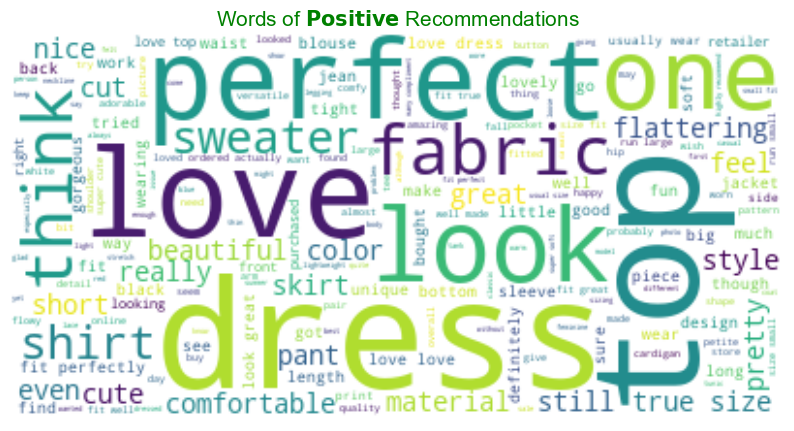

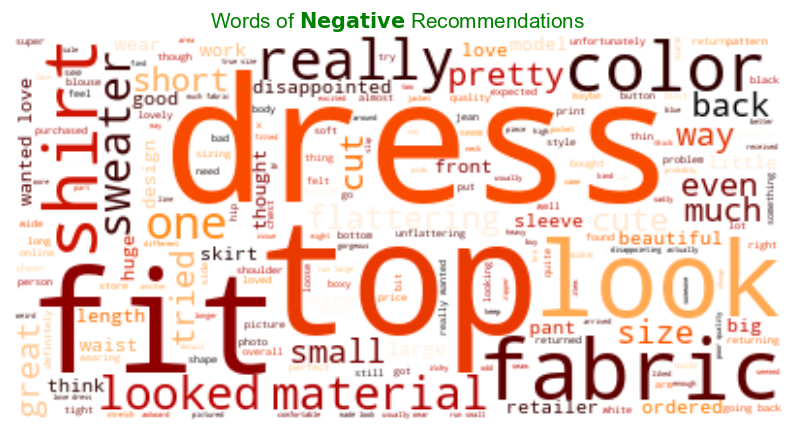

In [158]:
wordcloud = WordCloud(background_color="white").generate(text_positive)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off"),
plt.title('Words of '+r"$\bf{Positive}$"+' Recommendations', size=15, color='green')
plt.show()

wordcloud = WordCloud(background_color="white", colormap='gist_heat').generate(text_negative)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Words of '+r"$\bf{Negative}$"+' Recommendations', size=15, color='green')
plt.show()

> **[dress, fabric, top, look] gibi kelimeler hem recommeded 1 hem recommended 0 da var. Ama bunlari atamayiz. Cunku bu kelimelerin baska kelimelerle konbinleri modelde kullaniliyor. Bu degerli bilgiyi kaybetmemek icin kelimeler drop edilmez.**

## 5. Sentiment Classification with Machine Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [79]:
X=df['Review']
y=df["Recommended"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42) #,stratify =y

In [80]:
X_train.head()

22484    cute though inside soft got cream color absolu...
392      lovely fabric tiny hip hip bigger size u ca fu...
372      cool great drape length pattern super versatil...
16734    nice drape lovely navy looking navy shirt time...
16685    love tried local store immediately loved flatt...
Name: Review, dtype: object

In [81]:
y_train.head()

22484    1
392      1
372      1
16734    1
16685    1
Name: Recommended, dtype: int64

In the next step we create a numerical feature vector for each document:

### Vectorization

In [82]:
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer= CountVectorizer()
X_train_vectorized=vectorizer.fit_transform(X_train)
X_test_vectorized=vectorizer.transform(X_test)

In [83]:
pd.DataFrame(X_train_vectorized.toarray()).head(5)

,0,1,2,3,4,5,6,7,8,9,...,6977,6978,6979,6980,6981,6982,6983,6984,6985,6986
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
X_train_vectorized.shape

(15848, 6987)

In [85]:
X_test_vectorized.shape

(6793, 6987)

### TF-IDF
* TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
* IDF(t) = log_e(Total number of documents / Number of documents with term t in it).
* kelimenin document ta cok gecmesi, corpus ta az gecmesi TF*IDF degerini artirir.
* Ayrintili bilgi: https://www.bugraayan.com/2019/04/21/tf-idf-sade-anlatim/

In [86]:
tf_idf_vectorizer=TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [87]:
pd.DataFrame(X_train_tf_idf.toarray()).head(5)

,0,1,2,3,4,5,6,7,8,9,...,6977,6978,6979,6980,6981,6982,6983,6984,6985,6986
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1-Logistic Regression

In [88]:
log_model=LogisticRegression()
log_model.fit(X_train_vectorized,y_train)
y_pred=log_model.predict(X_test_vectorized)

In [89]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[794 424]
[ 262 5313]
              precision    recall  f1-score   support

           0       0.75      0.65      0.70      1218
           1       0.93      0.95      0.94      5575

    accuracy                           0.90      6793
   macro avg       0.84      0.80      0.82      6793
weighted avg       0.89      0.90      0.90      6793



In [90]:
log_accuracy = accuracy_score(y_test, y_pred)  #log_accuracy = log_model.score(X_test_vectorized,y_test) # alternative
log_f1_score = f1_score(y_test, y_pred, average='weighted')
log_recall = recall_score(y_test, y_pred, average='weighted')
print('log_accuracy:',log_accuracy,
      '\nlog_f1_score:',log_f1_score,
      '\nlog_recall:',log_recall)

log_accuracy: 0.8990136905638156 
log_f1_score: 0.8961396691465249 
log_recall: 0.8990136905638156


**`Cross Validation Scores`**

In [91]:
log_accuracy = cross_val_score(log_model, X_test_vectorized, y_test,cv = 10).mean()
log_f1_score = cross_val_score(log_model, X_test_vectorized, y_test,cv = 10,scoring='f1_weighted').mean()
log_recall = cross_val_score(log_model, X_test_vectorized, y_test,cv = 10,scoring='recall_weighted').mean()
print('log_accuracy:',log_accuracy,
      '\nlog_f1_score:',log_f1_score,
      '\nlog_recall:',log_recall)

log_accuracy: 0.8891490513731266 
log_f1_score: 0.8853226093243862 
log_recall: 0.8891490513731266


**`Tunning Logistic Regression`**

In [92]:
# log_params = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

In [93]:
# log_grid = GridSearchCV(LogisticRegression(), param_grid=log_params).fit(X_train_vectorized, y_train)

In [94]:
# log_grid.best_params_

In [95]:
# log_tuned = LogisticRegression(penalty='l2',C=10).fit(X_train_vectorized, y_train)

In [96]:
# y_pred = log_tuned.predict(X_test_vectorized)

In [155]:
# print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
# # print(classification_report(y_test, y_pred))

In [98]:
# log_accuracy = accuracy_score(y_test, y_pred)  #log_accuracy = log_model.score(X_test_vectorized,y_test) # alternative
# log_f1_score = f1_score(y_test, y_pred, average='weighted')
# log_recall = recall_score(y_test, y_pred, average='weighted')
# print('log_accuracy:',log_accuracy,
#       '\nlog_f1_score:',log_f1_score,
#       '\nlog_recall:',log_recall)

> **We get better scores with Default hyperparameters. So we ignore tunned model**

### 2-Naive Bayes 


In [99]:
naive_bayes= MultinomialNB()
naive_bayes.fit(X_train_vectorized,y_train)
y_pred=naive_bayes.predict(X_test_vectorized)

In [100]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[946 272]
[ 437 5138]
              precision    recall  f1-score   support

           0       0.68      0.78      0.73      1218
           1       0.95      0.92      0.94      5575

    accuracy                           0.90      6793
   macro avg       0.82      0.85      0.83      6793
weighted avg       0.90      0.90      0.90      6793



In [101]:
nb_accuracy = accuracy_score(y_test, y_pred)
nb_f1_score = f1_score(y_test, y_pred, average='weighted')
nb_recall = recall_score(y_test, y_pred, average='weighted')
print('nb_accuracy:',nb_accuracy,
      '\nnb_f1_score:',nb_f1_score,
      '\nnb_recall:',nb_recall)

nb_accuracy: 0.8956278522007949 
nb_f1_score: 0.8981545274454358 
nb_recall: 0.8956278522007949


**`Cross Validation Scores`**

In [102]:
nb_accuracy = cross_val_score(naive_bayes, X_test_vectorized, y_test,cv = 10).mean()
nb_f1_score = cross_val_score(naive_bayes, X_test_vectorized, y_test,cv = 10,scoring='f1_weighted').mean()
nb_recall = cross_val_score(naive_bayes, X_test_vectorized, y_test,cv = 10,scoring='recall_weighted').mean()
print('nb_accuracy:',nb_accuracy,
      '\nnb_f1_score:',nb_f1_score,
      '\nnb_recall:',nb_recall)

nb_accuracy: 0.8940095729013254 
nb_f1_score: 0.89113835174061 
nb_recall: 0.8940095729013254


**`Tunning Naive Bayes`**

In [103]:
# nb_params = {'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)}  

In [104]:
# nb_grid = GridSearchCV(naive_bayes,nb_params).fit(X_train_vectorized, y_train)

In [105]:
# nb_grid.best_params_

In [106]:
# nb_tuned = MultinomialNB(alpha=1).fit(X_train_vectorized, y_train)

In [107]:
# y_pred = nb_tuned.predict(X_test_vectorized)

In [108]:
# print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
# print(classification_report(y_test, y_pred))

### 3-Support Vector Machine (SVM)

In [109]:
svm = SVC()
svm.fit(X_train_vectorized,y_train)

y_pred = svm.predict(X_test_vectorized)

In [110]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[710 508]
[ 153 5422]
              precision    recall  f1-score   support

           0       0.82      0.58      0.68      1218
           1       0.91      0.97      0.94      5575

    accuracy                           0.90      6793
   macro avg       0.87      0.78      0.81      6793
weighted avg       0.90      0.90      0.90      6793



In [111]:
svm_accuracy = accuracy_score(y_test, y_pred)
svm_f1_score = f1_score(y_test, y_pred, average='weighted')
svm_recall = recall_score(y_test, y_pred, average='weighted')
print('svm_accuracy:',svm_accuracy,
      '\nsvm_f1_score:',svm_f1_score,
      '\nsvm_recall:',svm_recall)

svm_accuracy: 0.9026939496540557 
svm_f1_score: 0.895895423439175 
svm_recall: 0.9026939496540557


**`Cross Validation Scores`**

In [112]:
svm_accuracy = cross_val_score(svm, X_test_vectorized, y_test,cv = 10).mean()
svm_f1_score = cross_val_score(svm, X_test_vectorized, y_test,cv = 10,scoring='f1_weighted').mean()
svm_recall = cross_val_score(svm, X_test_vectorized, y_test,cv = 10,scoring='recall_weighted').mean()
print('svm_accuracy:',svm_accuracy,
      '\nsvm_f1_score:',svm_f1_score,
      '\nsvm_recall:',svm_recall)

svm_accuracy: 0.8869416529498398 
svm_f1_score: 0.873382240578357 
svm_recall: 0.8869416529498398


**`Tunning Support Vector Machine`**

In [113]:
# svm_params = {'C': [0.1, 1, 10, 100, 1000],  
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#               'kernel': ['rbf']} 

In [114]:
# svm_grid = GridSearchCV(SVC(), param_grid=svm_params).fit(X_train_vectorized, y_train)
# svm_grid = RandomizedSearchCV(SVC(), n_iter=5, param_distributions=svm_params).fit(X_train_vectorized, y_train)

In [115]:
# svm_grid.best_params_

In [116]:
# svm_tuned = SVC(C=1, gamma='auto', kernel='rbf').fit(X_train_vectorized, y_train)

In [117]:
# y_pred = svm_tuned.predict(X_test_vectorized)

In [118]:
# print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
# print(classification_report(y_test, y_pred))

In [119]:
# svm_accuracy = accuracy_score(y_test, y_pred)
# svm_f1_score = f1_score(y_test, y_pred, average='weighted')
# svm_recall = recall_score(y_test, y_pred, average='weighted')
# print('svm_accuracy:',svm_accuracy,
#       '\nsvm_f1_score:',svm_f1_score,
#       '\nsvm_recall:',svm_recall)

### 4-Random Forest

In [120]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train_vectorized, y_train)
y_pred = rf_model.predict(X_test_vectorized)

In [121]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[384 834]
[  55 5520]
              precision    recall  f1-score   support

           0       0.87      0.32      0.46      1218
           1       0.87      0.99      0.93      5575

    accuracy                           0.87      6793
   macro avg       0.87      0.65      0.69      6793
weighted avg       0.87      0.87      0.84      6793



In [122]:
rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_f1_score = f1_score(y_test, y_pred, average='weighted')
rfc_recall = recall_score(y_test, y_pred, average='weighted')
print('rfc_accuracy:',rfc_accuracy,
      '\nrfc_f1_score:',rfc_f1_score,
      '\nrfc_recall:',rfc_recall)

rfc_accuracy: 0.8691299867510672 
rfc_f1_score: 0.8426403457794505 
rfc_recall: 0.8691299867510672


**`Cross Validation Scores`**

In [123]:
rfc_accuracy = cross_val_score(rf_model, X_test_vectorized, y_test,cv = 10).mean()
rfc_f1_score = cross_val_score(rf_model, X_test_vectorized, y_test,cv = 10,scoring='f1_weighted').mean()
rfc_recall = cross_val_score(rf_model, X_test_vectorized, y_test,cv = 10,scoring='recall_weighted').mean()
print('rfc_accuracy:',rfc_accuracy,
      '\nrfc_f1_score:',rfc_f1_score,
      '\nrfc_recall:',rfc_recall)

rfc_accuracy: 0.8577930347396692 
rfc_f1_score: 0.8224554698089925 
rfc_recall: 0.858379970544919


**`Tunning Random Forest`**

In [124]:
# rf_params = {"n_estimators":[50,100],
#               "max_depth":[7,9,11],
#               "max_features": [8,10],
#               "min_samples_split": [2,4]}

* n_estimators=100 (default)
* decision tree 1 tree de sonuc buluyordu. burada [50, 100, 300] tree yap, bunlarin ortalamasini al dedik.
* 500, 1000 de listeye eklenebilir, ancak sure artar.

* max_depth, tree kac defa asagi gidecek, kac defa bolunecek
* defaultu None olanlara deger vermek genelde modelin sonuclarini kotulestirir.(richard Instructor)

* max_features,En iyi bölünmeyi ararken göz önünde bulundurulması gereken feature sayısıdir. defaultu number of featuresdur. 

* min_samples_split, bir node u bolmeden once gerekli olan minimum sample sayisidir. Bu sayiya dusunce split duruyor.

In [125]:
# rf_grid = GridSearchCV(RandomForestClassifier(), 
#                        rf_params, 
#                        cv = 5, 
#                        n_jobs = -1, 
#                        verbose = 2).fit(X_train_vectorized, y_train)


# rf_grid = RandomizedSearchCV(RandomForestClassifier(),
#                              rf_params,
#                              n_iter=10,
#                              cv = 5, 
#                              n_jobs = -1, 
#                              verbose = 2).fit(X_train_vectorized, y_train)

In [126]:
# rf_grid.best_params_

In [127]:
# rf_tuned = RandomForestClassifier(max_depth = 9,             
#                                   max_features = 8, 
#                                   min_samples_split = 2, 
#                                   n_estimators = 100).fit(X_train_vectorized, y_train)

In [128]:
# y_pred = rf_tuned.predict(X_test_vectorized)

In [129]:
# print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
# print(classification_report(y_test, y_pred))

In [130]:
# rfc_accuracy = accuracy_score(y_test, y_pred)
# rfc_f1_score = f1_score(y_test, y_pred, average='weighted')
# rfc_recall = recall_score(y_test, y_pred, average='weighted')
# print('rfc_accuracy:',rfc_accuracy,
#       '\nrfc_f1_score:',rfc_f1_score,
#       '\nrfc_recall:',rfc_recall)

### 5-Ada  Boosting

In [131]:
ada = AdaBoostClassifier()
ada.fit(X_train_vectorized, y_train)

y_pred = ada.predict(X_test_vectorized)

In [132]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[616 602]
[ 257 5318]
              precision    recall  f1-score   support

           0       0.71      0.51      0.59      1218
           1       0.90      0.95      0.93      5575

    accuracy                           0.87      6793
   macro avg       0.80      0.73      0.76      6793
weighted avg       0.86      0.87      0.87      6793



In [133]:
ada_accuracy = accuracy_score(y_test, y_pred)
ada_f1_score = f1_score(y_test, y_pred, average='weighted')
ada_recall = recall_score(y_test, y_pred, average='weighted')
print('ada_accuracy:',ada_accuracy,
      '\nada_f1_score:',ada_f1_score,
      '\nada_recall:',ada_recall)

ada_accuracy: 0.8735462976593552 
ada_f1_score: 0.865011951372353 
ada_recall: 0.8735462976593552


**`Tunning Ada Boosting`**

In [134]:
ada_params = {"n_estimators": [500, 300],
             "learning_rate":[0.5,1]}

In [135]:
# ada_grid = GridSearchCV(ada, 
#                        ada_params, 
#                        cv = 5, 
#                        n_jobs = -1, 
#                        verbose = 2).fit(X_train_vectorized, y_train)


# ada_grid = RandomizedSearchCV(ada,
#                              ada_params,
#                              n_iter=10,
#                              cv = 5, 
#                              n_jobs = -1, 
#                              verbose = 2).fit(X_train_vectorized, y_train)

In [136]:
# ada_grid.best_params_

In [137]:
ada_tuned = AdaBoostClassifier(learning_rate = 0.5,
                               n_estimators = 500).fit(X_train_vectorized, y_train)

In [138]:
y_pred = ada_tuned.predict(X_test_vectorized)

In [139]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[700 518]
[ 199 5376]
              precision    recall  f1-score   support

           0       0.78      0.57      0.66      1218
           1       0.91      0.96      0.94      5575

    accuracy                           0.89      6793
   macro avg       0.85      0.77      0.80      6793
weighted avg       0.89      0.89      0.89      6793



In [140]:
ada_accuracy = accuracy_score(y_test, y_pred)
ada_f1_score = f1_score(y_test, y_pred, average='weighted')
ada_recall = recall_score(y_test, y_pred, average='weighted')
print('ada_accuracy:',ada_accuracy,
      '\nada_f1_score:',ada_f1_score,
      '\nada_recall:',ada_recall)

ada_accuracy: 0.8944501692919181 
ada_f1_score: 0.8879656719604566 
ada_recall: 0.8944501692919181


**`Cross Validation Scores`**

In [141]:
ada_accuracy = cross_val_score(ada_tuned, X_test_vectorized, y_test,cv = 10).mean()
ada_f1_score = cross_val_score(ada_tuned, X_test_vectorized, y_test,cv = 10,scoring='f1_weighted').mean()
ada_recall = cross_val_score(ada_tuned, X_test_vectorized, y_test,cv = 10,scoring='recall_weighted').mean()
print('ada_accuracy:',ada_accuracy,
      '\nada_f1_score:',ada_f1_score,
      '\nada_recall:',ada_recall)

ada_accuracy: 0.8779630511998615 
ada_f1_score: 0.8699645022773408 
ada_recall: 0.8779630511998615


### 6-XGBoost

In [142]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_vectorized, y_train)

y_pred = xgb_model.predict(X_test_vectorized)

In [143]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[700 518]
[ 192 5383]
              precision    recall  f1-score   support

           0       0.78      0.57      0.66      1218
           1       0.91      0.97      0.94      5575

    accuracy                           0.90      6793
   macro avg       0.85      0.77      0.80      6793
weighted avg       0.89      0.90      0.89      6793



In [144]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='weighted')
xgb_recall = recall_score(y_test, y_pred, average='weighted')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

xgb_accuracy: 0.8954806418371853 
xgb_f1_score: 0.8888909440589197 
xgb_recall: 0.8954806418371853


**`Tunning XGBOOST`**

In [145]:
xgb = XGBClassifier()

In [146]:
xgb_params = {"n_estimators": [50, 100, 300,500],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

In [147]:
# xgb_gridGridSearchCVdSearchCVridSearchCV(xgb, xgb_params, cv = 5,
#                             n_jobs = -1, verbose = 2,scoring='f1').fit(X_train_vectorized, y_train)

In [148]:
# xgb_grid= RandomizedSearchCV(xgb, xgb_params, cv = 5,
#                              n_iter=10,
#                             n_jobs = -1, verbose = 2,scoring='f1').fit(X_train_vectorized, y_train)

In [149]:
# xgb_grid.best_params_

In [150]:
xgb_tuned = XGBClassifier(learning_rate= 0.1, 
                        max_depth= 7, 
                        n_estimators= 600,
                        subsample= 0.8).fit(X_train_vectorized, y_train)

In [151]:
y_pred = xgb_tuned.predict(X_test_vectorized)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.61      0.69      1218
           1       0.92      0.96      0.94      5575

    accuracy                           0.90      6793
   macro avg       0.85      0.79      0.81      6793
weighted avg       0.89      0.90      0.89      6793



In [152]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='weighted')
xgb_recall = recall_score(y_test, y_pred, average='weighted')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

xgb_accuracy: 0.8994553216546445 
xgb_f1_score: 0.894615619398948 
xgb_recall: 0.8994553216546445


**`Cross Validation Scores`**

In [153]:
xgb_accuracy = cross_val_score(xgb_tuned, X_test_vectorized, y_test,cv = 10).mean()
xgb_f1_score = cross_val_score(xgb_tuned, X_test_vectorized, y_test,cv = 10,scoring='f1_weighted').mean()
xgb_recall = cross_val_score(xgb_tuned, X_test_vectorized, y_test,cv = 10,scoring='recall_weighted').mean()
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

xgb_accuracy: 0.8915048081088106 
xgb_f1_score: 0.8850866378470718 
xgb_recall: 0.8915048081088106


### `Compare Models Accuracies & F1 Scores & Recall`

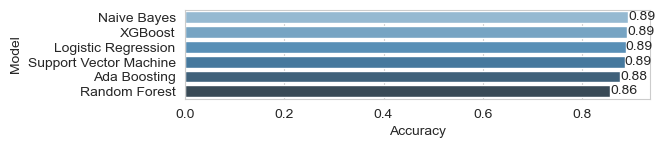

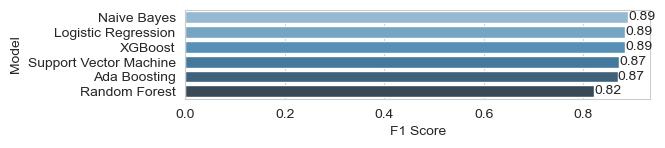

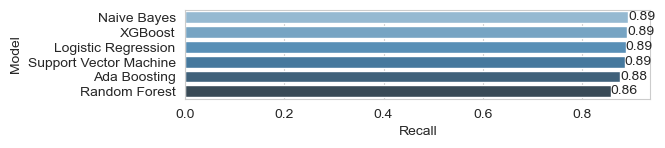

In [154]:
compare = pd.DataFrame({"Model": ["Random Forest", "XGBoost","Logistic Regression",'Naive Bayes','Ada Boosting','Support Vector Machine'],
                        "Accuracy": [rfc_accuracy, xgb_accuracy, log_accuracy, nb_accuracy,ada_accuracy, svm_accuracy],
                        "F1 Score": [rfc_f1_score, xgb_f1_score, log_f1_score, nb_f1_score, ada_f1_score, svm_f1_score],
                        "Recall": [rfc_recall, xgb_recall, log_recall, nb_recall,ada_recall, svm_recall]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()    # get bar length
        ax.text(width,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width), # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center')  # vertical alignment
    
plt.subplot(311)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

plt.subplot(312)
compare = compare.sort_values(by="F1 Score", ascending=False)
ax=sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

plt.subplot(313)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

### Conclusion

This project was aimed to used sentiment analysis to determined product recommendation. We started with the data engineering and text mining, which cover change text into tokens, remove punctuation, numbers, stop words and normalization them by using lemmatization. Following we used bag of words model to convert the text into numerical feature vectors.

>  **Finally we trained 5 different Classification models and we got the best F1 Score of 0.89 for Naive Bayes with Count Vectorized values.** 

In [159]:
# count vectorized transformation
X_vectorized=vectorizer.transform(X)

In [160]:
# Training Model with all corpus
naive_bayes= MultinomialNB()
naive_bayes.fit(X_vectorized,y)

MultinomialNB()

In [161]:
# Saving Model

import pickle
pickle.dump(naive_bayes,open("naive_bayes","wb"))
naive_bayes_model = pickle.load(open("naive_bayes","rb"))

In [166]:
# Running Model with a sample comment

# comment = "I didn't like it. it was disappointed."
comment = "I like it. it is cool and confortable."

In [167]:
# Remove Punctuations

import string
comment=comment.translate(str.maketrans('', '', string.punctuation))

In [168]:
# Transform to count vectorized 

transformed_comment = vectorizer.transform(pd.Series(comment))

In [169]:
# Label Prediction of the Model

naive_bayes_model.predict(transformed_comment)[0]

1